In [1]:
from modules import *
from functions import *

In [48]:
""" Params P3 """

tau_E = 0.045       # decay time constant 
tau_I = 0.0225  
tau_r_E = 5.5       # synaptic depression constant 
tau_r_I = 5        
tau_f_E = 0.8       # synaptic facilitation constant 
tau_f_I = 0.8       
U_EE = 0.9           # release probability
U_IE = 0.9
U_II = 0.9
U_EI = 0.9
J_EE = 3.7           # synaptic efficacy
J_IE = 3.7
J_II = 0.1
J_EI = 0.1
theta_E = 0.3       # activity threshold
theta_I = 0.3

""" Params P14 """

tau_E = 0.020       # decay time constant 
tau_I = 0.010  
tau_r_E = 0.7       # synaptic depression constant 
tau_r_I = 0.4        
tau_f_E = 0.1       # synaptic facilitation constant 
tau_f_I = 0.1       
U_EE = 0.65           # release probability
U_IE = 0.65
U_II = 0.55
U_EI = 0.55
J_EE = 6.3           # synaptic efficacy
J_IE = 6.3
J_II = 0
J_EI = 0
theta_E = 0.7       # activity threshold
theta_I = 1.7

# def G(x):
#     return 0 if x<=0 else x

def G(x):
    return np.where(x <= 0, 0, x)

In [49]:
def E_update(E, I, J_EE, J_EI, u_EE, u_EI, x_EE, x_EI, e_E, theta_E):
    h_E = J_EE * u_EE * x_EE * E - J_EI * u_EI * x_EI * I + e_E - theta_E
    return -E + G(h_E)

def I_update(E, I, J_IE, J_II, u_IE, u_II, x_IE, x_II, e_I, theta_I):
    h_I = J_IE * u_IE * x_IE * E - J_II * u_II * x_II * I + e_I - theta_I
    return -I + G(h_I)

def x_update(x, tau_r, u, A):
    return (1 - x) / (tau_r + 1e-10) - u * x * A

def u_update(U, u, tau_f, A):
    return (U - u) / (tau_f + 1e-10) + U * (1 - u) * A

In [59]:
T = 1
dt = 0.001
timesteps = np.arange(0, T, dt)

E, I, x_EE, x_EI, x_IE, x_II, u_EE, u_EI, u_IE, u_II = [np.zeros_like(timesteps) for _ in range(10)]

x_EE[0] = 1.
x_EI[0] = 1.
x_IE[0] = 1.
x_II[0] = 1.
u_EE[0] = U_EE
u_EI[0] = U_EI
u_IE[0] = U_IE
u_II[0] = U_II

e_E = 0.
e_I = 0.

for t in range(len(timesteps)-1):
    E[t+1] = E[t] + (dt/tau_E) * E_update(E[t], I[t], J_EE, J_EI, u_EE[t], u_EI[t], x_EE[t], x_EI[t], e_E, theta_E)
    I[t+1] = I[t] + (dt/tau_I) * I_update(E[t], I[t], J_IE, J_II, u_IE[t], u_II[t], x_IE[t], x_II[t], e_I, theta_I)

    x_EE[t+1] = x_EE[t] + dt * x_update(x_EE[t], tau_r_E, u_EE[t], E[t])
    x_EI[t+1] = x_EI[t] + dt * x_update(x_EI[t], tau_r_I, u_EI[t], I[t])
    x_IE[t+1] = x_IE[t] + dt * x_update(x_IE[t], tau_r_E, u_IE[t], E[t])
    x_II[t+1] = x_II[t] + dt * x_update(x_II[t], tau_r_I, u_II[t], I[t])
    u_EE[t+1] = u_EE[t] + dt * u_update(U_EE, u_EE[t], tau_f_E, E[t])
    u_EI[t+1] = u_EI[t] + dt * u_update(U_EI, u_EI[t], tau_f_I, I[t])
    u_IE[t+1] = u_IE[t] + dt * u_update(U_IE, u_IE[t], tau_f_E, E[t])
    u_II[t+1] = u_II[t] + dt * u_update(U_II, u_II[t], tau_f_I, I[t])

    if t==100:
        e_E = 1


(0.0, 999.0, -5.0, 50.0)

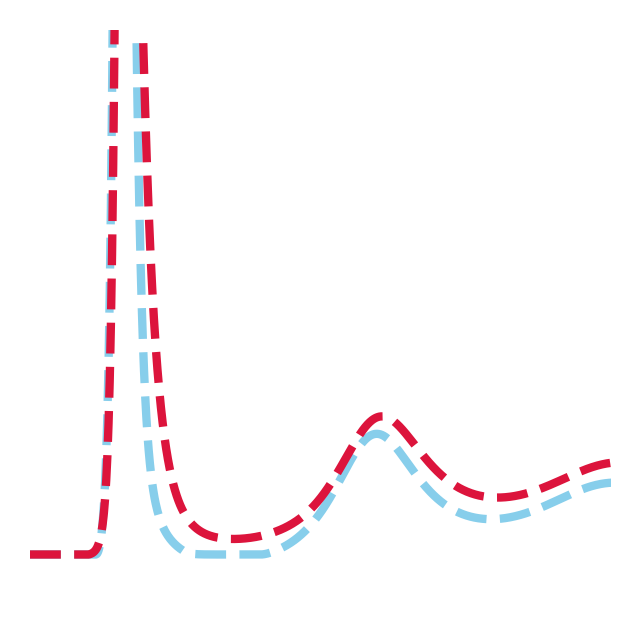

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=300)

ax.plot(I, c='skyblue', lw=2, ls='--')
ax.plot(E, c='crimson', lw=2, ls='--')

ax.set_ylim(-5, 50)
plt.axis('off')

(0.0, 50.0)

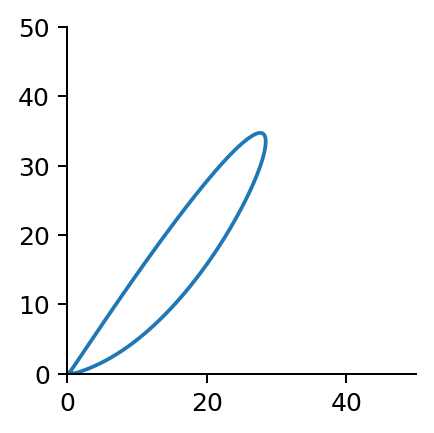

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=180)

ax.plot(E, I)
ax.set_ylim(0, 50)
ax.set_xlim(0, 50)

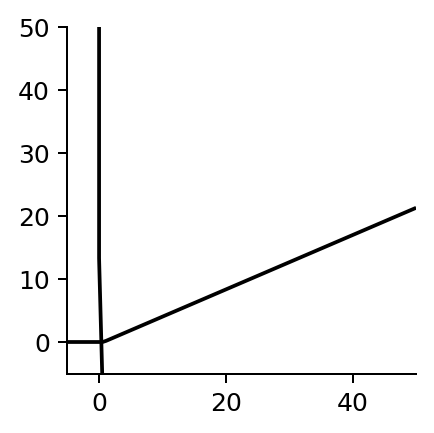

In [27]:
def dEdt(E, I):
    return E_update(E, I, J_EE, J_EI, u_EE[-1], u_EI[-1], x_EE[-1], x_EI[-1], e_E, theta_E) / tau_E

def dIdt(E, I):
    return I_update(E, I, J_IE, J_II, u_IE[-1], u_II[-1], x_IE[-1], x_II[-1], e_I, theta_I) / tau_I


E_range = np.linspace(-5, 50, 100)
I_range = np.linspace(-5, 50, 100)
E_grid, I_grid = np.meshgrid(E_range, I_range)

dEdt_grid = dEdt(E_grid, I_grid)
dIdt_grid = dIdt(E_grid, I_grid)


fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=180)

ax.contour(E_grid, I_grid, dEdt_grid, levels=[0], colors='black')
ax.contour(E_grid, I_grid, dIdt_grid, levels=[0], colors='black')


(-5.0, 50.0)

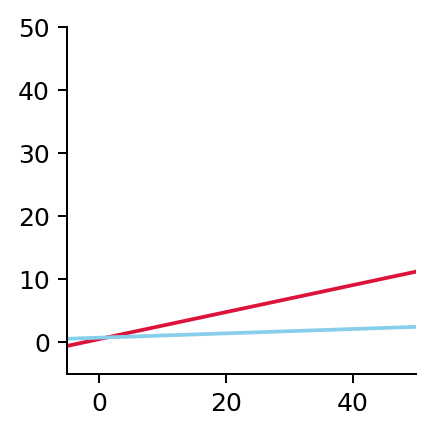

In [33]:
def E_null(I):
    return (J_EI * u_EI[-1] * x_EI[1] * I + e_E - theta_E) / (J_EE * u_EE[-1] * x_EE[-1])

def I_null(E):
    return (J_IE * u_IE[-1] * x_IE[-1] * E + e_I - theta_I) / (J_II * u_II[-1] * x_II[-1])

E_range = np.linspace(-5, 50, 100)
I_range = np.linspace(-5, 50, 100)

fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=180)
ax.plot(E_range, E_null(I_range), c='crimson')
ax.plot(I_null(E_range), I_range, c='skyblue')

ax.set_xlim(-5, 50)
ax.set_ylim(-5, 50)